In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Carga de Datos

In [3]:
train = pd.read_csv("datos/Train.csv")
test = pd.read_csv("datos/Test.csv")
health_camp = pd.read_csv("datos/Health_Camp_Detail.csv")
patient = pd.read_csv("datos/Patient_Profile.csv")
first_format_camp = pd.read_csv("datos/First_Health_Camp_Attended.csv")
second_format_camp = pd.read_csv("datos/Second_Health_Camp_Attended.csv")
third_format_camp = pd.read_csv("datos/Third_Health_Camp_Attended.csv")

<b> Health Camp Details </b>

In [4]:
health_camp.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-oct-03,First,C,2
2,6544,03-nov-03,15-nov-03,First,F,1
3,6585,22-nov-03,05-Dec-03,First,E,2
4,6561,30-nov-03,18-Dec-03,First,E,1


<b> Patient Profile  </b>

In [5]:
patient.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1.0,90.0,39.0,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1.0,NaN,40.0,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3.0,87.0,46.0,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1.0,75.0,47.0,02-Nov-02,D,Education
4,521075,0,0,0,0,3.0,NaN,80.0,24-Nov-02,H,Others


In [6]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29828 entries, 0 to 29827
Data columns (total 11 columns):
Patient_ID           29828 non-null int64
Online_Follower      29828 non-null int64
LinkedIn_Shared      29828 non-null int64
Twitter_Shared       29828 non-null int64
Facebook_Shared      29828 non-null int64
Income               4061 non-null float64
Education_Score      1384 non-null float64
Age                  4570 non-null float64
First_Interaction    29828 non-null object
City_Type            11533 non-null object
Employer_Category    2702 non-null object
dtypes: float64(3), int64(5), object(3)
memory usage: 2.5+ MB


<b> First Format </b>

In [7]:
first_format_camp.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390


<b> Second Format </b>

In [8]:
second_format_camp.head()

,Patient_ID,Health_Camp_ID,Health Score
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


<b> Third Format </b>

In [9]:
third_format_camp.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,501825,6527,2,4


In [10]:
print("Dimensión de Train: ", train.shape)
print("Dimensión de Test: ", test.shape)
print("Dimensión de Health Camp Details: ", health_camp.shape)
print("Dimensión de Patien Profile: ", patient.shape)
print("Dimensión de 1st. Camp Attended: ", first_format_camp.shape)
print("Dimensión de 2nd. Camp Attended: ", second_format_camp.shape)
print("Dimensión de 3rd. Camp Attended: ", third_format_camp.shape)


Dimensión de Train:  (58532, 8)
Dimensión de Test:  (16746, 8)
Dimensión de Health Camp Details:  (44, 6)
Dimensión de Patien Profile:  (29828, 11)
Dimensión de 1st. Camp Attended:  (5491, 4)
Dimensión de 2nd. Camp Attended:  (3629, 3)
Dimensión de 3rd. Camp Attended:  (4343, 4)


## 1.1 Exploración de Datos del Train Set

In [11]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,524931,6535,07-Feb-04,0,0,0,0,0
3,494493,6570,20-May-05,0,0,0,0,0
4,523001,6562,22-May-05,0,0,0,0,0


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58532 entries, 0 to 58531
Data columns (total 8 columns):
Patient_ID           58532 non-null int64
Health_Camp_ID       58532 non-null int64
Registration_Date    58209 non-null object
Var1                 58532 non-null int64
Var2                 58532 non-null int64
Var3                 58532 non-null int64
Var4                 58532 non-null int64
Var5                 58532 non-null int64
dtypes: int64(7), object(1)
memory usage: 3.6+ MB


In [13]:
train.describe(include='all')

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
count,58532.000000,58532.000000,58209,58532.000000,58532.000000,58532.000000,58532.000000,58532.000000
unique,NaN,NaN,1201,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,08-May-05,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,554,NaN,NaN,NaN,NaN,NaN
mean,507268.932669,6550.228388,NaN,0.849706,0.255963,0.000393,0.022774,0.262677
std,12402.186003,19.904126,NaN,7.950882,3.902489,0.019819,0.202353,1.236517
min,485679.000000,6523.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,496527.000000,6536.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,507343.000000,6543.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
75%,517950.000000,6570.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
# Numero de Pacientes Unicos en el Train Set

In [15]:
print("El número de personas unicas en el Train Set: ", len(train["Patient_ID"].unique()))

El número de personas unicas en el Train Set:  25197


In [16]:
grouped_df  = train.groupby('Patient_ID').agg("size").reset_index()
grouped_df.head()

,Patient_ID,0
0,485679,2
1,485680,1
2,485681,2
3,485684,1
4,485685,1


In [17]:
grouped_df.columns = ["Patient_ID", "Number_of_entries_per_person"]
grouped_df.head()

,Patient_ID,Number_of_entries_per_person
0,485679,2
1,485680,1
2,485681,2
3,485684,1
4,485685,1


In [18]:
grouped_df = grouped_df.groupby('Number_of_entries_per_person').agg('size').reset_index()
grouped_df.head()

,Number_of_entries_per_person,0
0,1,14441
1,2,4508
2,3,1994
3,4,1175
4,5,836


In [19]:
grouped_df.columns = ["Number_of_entries_per_person", "Count"]
grouped_df.head()

,Number_of_entries_per_person,Count
0,1,14441
1,2,4508
2,3,1994
3,4,1175
4,5,836


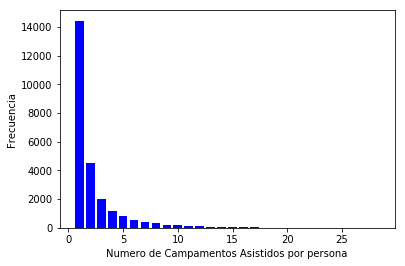

In [20]:
plt.bar(grouped_df["Number_of_entries_per_person"], grouped_df["Count"], color='b')
plt.xlabel("Numero de Campamentos Asistidos por persona")
plt.ylabel("Frecuencia")
plt.show()

<p>Vemos que la mayoría de gente solo ha asistido una vez a un Campamento Médico.</p>
<p>Hay 14,441 personas que solo han asistido una vez a un campamento.</p> Hay 4,508 personas que han asistido 2 veces, y así sucesivamente.

<b> Observemos el Número de Campamentos Médicos (Puestos de Salud) distintos en el Train Set. </b>

In [21]:
print("Número de Puestos de Salud en el Train Set: ", len(train["Health_Camp_ID"].unique()))

Número de Puestos de Salud en el Train Set:  37


In [23]:
grouped_df  = train.groupby("Health_Camp_ID").agg('size').reset_index()
grouped_df.columns = ["Health_Camp_ID", "Count"]
grouped_df = grouped_df.sort_values('Count', ascending=False).reset_index(drop=True)
grouped_df.head()

,Health_Camp_ID,Count
0,6543,6543
1,6527,4144
2,6538,3954
3,6526,3809
4,6570,3564


In [24]:
grouped_df.tail(3)

,Health_Camp_ID,Count
34,6565,66
35,6557,52
36,6558,44


<p>Podemos ver que hay puestos de salud que han sido más visitados que otros.</p>
Por ejemplo, el puesto de salud más visitado fue el puesto cuyo ID es 6543 ya que fue sido visitado 6543 veces.
Por otro lado, el puesto menos visitado fue el '6558', pues solo lo visitaron 44 veces. 


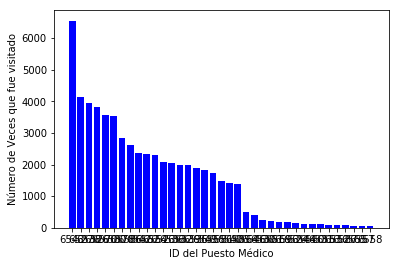

In [25]:
plt.bar(range(len(grouped_df.Health_Camp_ID)), grouped_df.Count, tick_label=grouped_df.Health_Camp_ID, color='b')
plt.xlabel("ID del Puesto Médico")
plt.ylabel("Número de Veces que fue visitado")
plt.show()

## 1.2 Exploración de los Datos del Test Set

In [26]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,523729,6534,29-Apr-06,0,0,0,0,0
1,521364,6529,28-Feb-06,15,1,0,0,7
2,506153,6534,25-Mar-06,0,0,0,0,0
3,514205,6571,15-Sep-05,0,0,0,0,0
4,496155,6541,18-Nov-05,0,0,0,0,0


In [27]:
print("EL numero de filas y columnas en el Test es: ",test.shape) 

EL numero de filas y columnas en el Test es:  (16746, 8)


In [28]:
print("El número de personas unicas en el Test Set: ", len(test["Patient_ID"].unique()))

El número de personas unicas en el Test Set:  10567


Es decir, en los 16,746 registros del Test Set, solo hay 10,567 personas distintas.

In [29]:
grouped_df = test.groupby('Patient_ID').agg('size').reset_index()
grouped_df.columns = ["Patient_ID", "Number_of_entries_per_person"]
grouped_df = grouped_df.groupby('Number_of_entries_per_person').agg('size').reset_index()
grouped_df.columns = ["Number_of_entries_per_person", "Count"]
grouped_df.head()

,Number_of_entries_per_person,Count
0,1,6789
1,2,2261
2,3,881
3,4,425
4,5,176


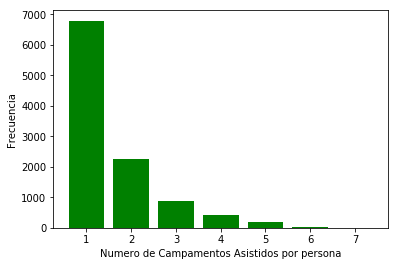

In [30]:
plt.bar(grouped_df.Number_of_entries_per_person, grouped_df.Count, color='g')
plt.xlabel("Numero de Campamentos Asistidos por persona")
plt.ylabel("Frecuencia")
plt.show()

Vemos nuevamente que la mayoría de pacientes del Test Set solo asistió una vez a un campamento médico.

In [31]:
print("Número de Puestos de Salud distintos en el Test Set: ", len(test["Health_Camp_ID"].unique()))

Número de Puestos de Salud distintos en el Test Set:  7


In [32]:
grouped_df = test.Health_Camp_ID.value_counts().reset_index()
grouped_df.columns = ["Health_Camp_ID", "Count"]
grouped_df

,Health_Camp_ID,Count
0,6537,3859
1,6529,3823
2,6534,3597
3,6571,2086
4,6528,1744
5,6541,1547
6,6575,90


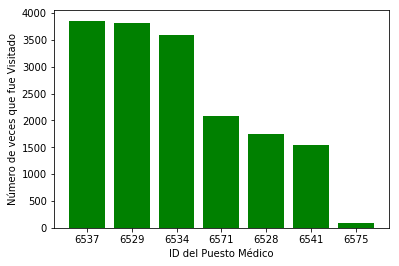

In [33]:
plt.bar(range(len(grouped_df.Health_Camp_ID)), grouped_df.Count, tick_label=grouped_df.Health_Camp_ID, color='g')
plt.xlabel("ID del Puesto Médico")
plt.ylabel("Número de veces que fue Visitado")
plt.show()

<b> Ahora veamos cuál es el número de Pacientes y Puesto de Campaña comunes en el Train y Test Set</b> 

In [34]:
print( "Número de Pacientes comunes entre el train and test : ",
      len(set(train["Patient_ID"]).intersection(test["Patient_ID"])))
print("Número de Puestos de Salud comunes entre el train and test :",
      len(set(train["Health_Camp_ID"]).intersection(test["Health_Camp_ID"])))

Número de Pacientes comunes entre el train and test :  5936
Número de Puestos de Salud comunes entre el train and test : 0


<b>Comentario: </b> Dado que no hay HelthCamps comunes entre el Test y Train set pues las fechas son disjuntas, sería util usar un esquema de validación que refleje el mismo comportamiento.

<b> Ordenando Health_Camp_ID en el Train y Test Set de manera ascendente para ver si hay overlap, y comprobar la hipótesis de que la división (split) entre en Train y Test fue hecha basándose en un corte temporal (fecha) </b>

In [35]:
df_train=pd.DataFrame(train["Health_Camp_ID"].sort_values())

In [36]:
df_train.head()

,Health_Camp_ID
46948,6523
44608,6523
2282,6523
53036,6523
42044,6523


In [37]:
df_test = pd.DataFrame(test["Health_Camp_ID"].sort_values())

In [38]:
df_test.head()

,Health_Camp_ID
16745,6528
10017,6528
10020,6528
5523,6528
5522,6528


In [39]:
data_concatenada = pd.concat([df_train,df_test], axis = 1)
data_concatenada

,Health_Camp_ID,Health_Camp_ID
0,6578,6534.0
1,6578,6529.0
2,6535,6534.0
3,6570,6571.0
4,6562,6541.0
5,6535,6528.0
6,6538,6534.0
7,6538,6537.0
8,6527,6541.0
9,6585,6575.0


In [43]:
data_concatenada.columns = ["Health_Camp_ID_Train", "Health_Camp_ID_Test"]
data_concatenada.head()

,Health_Camp_ID_Train,Health_Camp_ID_Test
0,6578,6534.0
1,6578,6529.0
2,6535,6534.0
3,6570,6571.0
4,6562,6541.0


In [44]:
data_concatenada.sort_values(['Health_Camp_ID_Train','Health_Camp_ID_Test']).head(200)

,Health_Camp_ID_Train,Health_Camp_ID_Test
186,6523,6528.0
331,6523,6528.0
437,6523,6528.0
447,6523,6528.0
507,6523,6528.0
681,6523,6528.0
773,6523,6528.0
844,6523,6528.0
891,6523,6528.0
2153,6523,6528.0


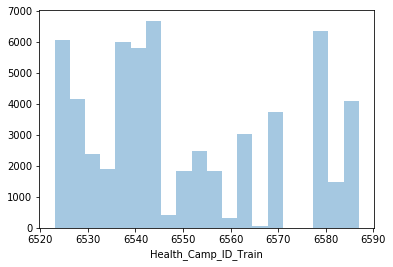

In [45]:
plot=sns.distplot(data_concatenada["Health_Camp_ID_Train"],kde=False,bins=20)

In [46]:
df1=data_concatenada.dropna(subset=["Health_Camp_ID_Test"])

In [47]:
df1["Health_Camp_ID_Test"]=df1["Health_Camp_ID_Test"].astype(float)

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


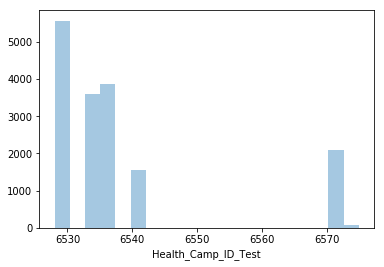

In [48]:
plot=sns.distplot(df1["Health_Camp_ID_Test"],kde=False,bins=20)

# 2. Construyendo la variable Target

<p>Para los 2 primeros formatos:</p>
    Los que cumplen la condición de "Health Score" > 0 tienen valor de Target igual 1.
<p>Para el tercer formato:</p>
    Los que cumplen la condición de "Number_of_stall_visited" > 0 tienen valor de Target igual 1.

In [49]:
# Extraemos solo las columnas necesarias y las renombramos para poder luego poder Concatenar 

In [50]:
col_names = [['Patient_ID','Health_Camp_ID','Target']]

In [51]:
col_names

[['Patient_ID', 'Health_Camp_ID', 'Target']]

In [52]:
# Creamos un nuevo DF "first_camp"
first_camp = first_format_camp[['Patient_ID','Health_Camp_ID','Health_Score']]
first_camp.head()

,Patient_ID,Health_Camp_ID,Health_Score
0,506181,6560,0.439024
1,494977,6560,0.097561
2,518680,6560,0.048780
3,509916,6560,0.634146
4,488006,6560,0.024390


In [53]:
# Le cambiamos el nombre de las columnas al DF "first_camp"
first_camp.columns = col_names
first_camp.head()

,Patient_ID,Health_Camp_ID,Target
0,506181,6560,0.439024
1,494977,6560,0.097561
2,518680,6560,0.048780
3,509916,6560,0.634146
4,488006,6560,0.024390


In [54]:
# Hacemos lo mismo con el 2do. Campamento
second_camp = second_format_camp[['Patient_ID','Health_Camp_ID','Health Score']]
second_camp.columns = col_names
second_camp.head()

,Patient_ID,Health_Camp_ID,Target
0,526631,6536,0.875136
1,509122,6536,0.755700
2,498864,6536,0.673181
3,515398,6536,0.722041
4,504624,6536,0.464712


In [55]:
# Tercer Campamento

# Nos quedamos con las 3 primeras columnas
third_camp = third_format_camp[['Patient_ID','Health_Camp_ID','Number_of_stall_visited']]
third_camp.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited
0,517875,6527,3
1,504692,6578,1
2,504692,6527,3
3,493167,6527,4
4,501825,6527,2


In [56]:
# Para construir la Var.Target en el 3er.Campamento, verificamos que se cumpla la condicion requerida.
third_camp = third_camp[third_camp['Number_of_stall_visited']>0]
third_camp.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited
0,517875,6527,3
1,504692,6578,1
2,504692,6527,3
3,493167,6527,4
4,501825,6527,2


In [57]:
third_camp.shape

(4325, 3)

In [58]:
# Renombramos la ultima columna del 3er.Campamento
third_camp.columns = col_names
third_camp.head()

,Patient_ID,Health_Camp_ID,Target
0,517875,6527,3
1,504692,6578,1
2,504692,6527,3
3,493167,6527,4
4,501825,6527,2


<b> Concatenamos los 3 Campamentos Medicos </b>

In [59]:
all_camps = pd.concat([first_camp, second_camp, third_camp])
all_camps.head()

,Patient_ID,Health_Camp_ID,Target
0,506181,6560,0.439024
1,494977,6560,0.097561
2,518680,6560,0.048780
3,509916,6560,0.634146
4,488006,6560,0.024390


In [60]:
all_camps['Target'] = 1

In [61]:
all_camps.head()

,Patient_ID,Health_Camp_ID,Target
0,506181,6560,1
1,494977,6560,1
2,518680,6560,1
3,509916,6560,1
4,488006,6560,1


In [65]:
print("El número de resultados favorables de todos los Campamentos es : ", all_camps.shape[0])

El número de resultados favorables de todos los Campamentos es :  13445


In [68]:
# Volvemos a cargar el Train Set y creamos la variable "Target" para poder ser usada en la etapa de entrenamiento.

train = pd.read_csv("datos/Train.csv")
print(train.shape)

(58532, 8)


In [69]:
# Hacemos un merge tomando la tupla ('Patient_ID','Health_Camp_ID') como identificador único.

train = train.merge(all_camps, on=['Patient_ID','Health_Camp_ID'], how='left')
train['Target'] = train['Target'].fillna(0).astype('int')
train.head()

C:\Users\Andres\Anaconda3\lib\site-packages\pandas\core\generic.py:2530: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

<b> Creamos un nuevo archivo csv con la BD de TRain con la variable Target </b>


In [95]:
train.to_csv('datos/train_con_target.csv', index=False)

<b> Distribución de la variable Target en el Train Set </b> 

In [96]:
print(train["Target"].value_counts())

0    45087
1    13445
Name: Target, dtype: int64
